<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/ForageInternships/blob/main/TataTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

Here is the background information on your task

The CEO and CMO have recently met to finalise the requirements and would like you to provide them with some analysis and visuals that would help answer their questions. Both, the executives are interested in viewing and understanding how they can use the data to make more meaningful decisions. You would need to provide insights which they can use to create the expansion strategy. The executives want to analyse the trends and the breakdown by different categories so that they have clarity on how the revenue is being generated and what are the main factors affecting the online store.

You will be provided with the requirements of the executives and how they want to view the data. After the requirement gathering phase, you would need to make sure that the data you are using is of good quality and does not contain any bad data that would have an adverse impact on your analysis. Once the data is cleaned, the next step would be to create the visuals on either Tableau or Power BI. No matter which tool you choose for the visuals, the result should be the same. These results will help the executives with effective decision making and assist in their expansion strategy.

Here is your task

In this task, you will create the visuals around four of the questions that the CEO and CMO have requested. You can use either Tableau or Power BI to create the visuals and we’ve provided the data in the resources below. 
Both Power BI and Tableau have free trials that can be accessed in order to complete this task. You can find a resource below that directs you how to download these free trials.

Data cleanup 
Before you can begin the analysis, make sure that the data is cleaned properly. You have noticed that the data contains some returns to the store which are provided in negative quantities and there are unit prices which were input in error. You will need to perform the following steps to clean this data.

Create a check that the quantity should not be below 1 unit
Create a check that the Unit price should not be below $0
Please note that in order to apply the checks that have been mentioned above, you would need to use conditional formulas where the logic would state that if the conditions are met then the tool should exclude the data from analysis. You can also use data transformation methods to get rid of the bad data. Both these methods are provided in the resources section. Once this is done, the data will be good to be used for further analysis. Please note that this data should be cleaned up before attempting any question.

Create each visual on a separate tab with the name of the tab displaying the question number. Once the visuals are created, save the files and upload them below. 
For Tableau users, you would need to upload in .twbx format whereas Power BI files need to be saved in .pbix format. 
Instructions on how to save in these formats are provided in the resources section.

Should you get stuck, please reference the Visuals Hints document in the resources.

Questions

**Question 1**

The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.

**Question 2**

The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, the CMO is also interested in viewing the quantity sold along with the revenue generated. The CMO does not want to have the United Kingdom in this visual.

**Question 3**

The CMO of the online retail store wants to view the information on the top 10 customers by revenue. He is interested in a visual that shows the greatest revenue generating customer at the start and gradually declines to the lower revenue generating customers. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.

**Question 4**

The CEO is looking to gain insights on the demand for their products. He wants to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, he will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. There is no need to show data for the United Kingdom as the CEO is more interested in viewing the countries that have expansion opportunities.

In [1]:
#Initial Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://github.com/Daniel-Benson-Poe/ForageInternships/blob/main/Tata/TheData/Online%20Retail.xlsx?raw=true

--2022-08-07 03:29:11--  https://github.com/Daniel-Benson-Poe/ForageInternships/blob/main/Tata/TheData/Online%20Retail.xlsx?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Daniel-Benson-Poe/ForageInternships/raw/main/Tata/TheData/Online%20Retail.xlsx [following]
--2022-08-07 03:29:11--  https://github.com/Daniel-Benson-Poe/ForageInternships/raw/main/Tata/TheData/Online%20Retail.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Daniel-Benson-Poe/ForageInternships/main/Tata/TheData/Online%20Retail.xlsx [following]
--2022-08-07 03:29:11--  https://raw.githubusercontent.com/Daniel-Benson-Poe/ForageInternships/main/Tata/TheData/Online%20Retail.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.

In [3]:
online_retail_data = pd.read_excel("Online Retail.xlsx?raw=true")

In [4]:
#Look at the first five rows
online_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Take a look at the data summary
online_retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
#Now the non-numeric
online_retail_data.describe(exclude="number")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909.0,541909,540455,541909,541909
unique,25900.0,4070,4223,23260,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114.0,2313,2369,1114,495478
first,NaN,NaN,NaN,2010-12-01 08:26:00,NaN
last,NaN,NaN,NaN,2011-12-09 12:50:00,NaN


In [7]:
#Check nan count
online_retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#Look at shape of data
online_retail_data.shape

(541909, 8)

In [9]:
online_retail_data["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Create a check that the quantity should not be below 1 unit Create a check that the Unit price should not be below $0 Please note that in order to apply the checks that have been mentioned above, you would need to use conditional formulas where the logic would state that if the conditions are met then the tool should exclude the data from analysis. You can also use data transformation methods to get rid of the bad data. Both these methods are provided in the resources section. Once this is done, the data will be good to be used for further analysis. Please note that this data should be cleaned up before attempting any question.

In [10]:
online_retail_data["Quantity"].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [12]:
online_retail_fixed1 = online_retail_data[online_retail_data["Quantity"] >= 1]
online_retail_fixed1["Quantity"].value_counts()

1        148227
2         81829
12        61063
6         40868
4         38484
          ...  
828           1
512           1
3100          1
291           1
80995         1
Name: Quantity, Length: 393, dtype: int64

In [13]:
online_retail_fixed1["UnitPrice"].value_counts()

1.25       49753
1.65       37498
0.85       28061
2.95       27106
0.42       24302
           ...  
156.45         1
28.66          1
46.86          1
84.21          1
1714.17        1
Name: UnitPrice, Length: 1293, dtype: int64

In [17]:
online_retail_fixed1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
online_retail_fixed1[online_retail_fixed1["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [19]:
online_retail_final = online_retail_fixed1[online_retail_fixed1["UnitPrice"] >= 0]
online_retail_final[online_retail_final["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
online_retail_final.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

As not having the item/product description will hurt our analysis on many of the questions we want to answer we will drop the rows containing null description values. For the CustomerID, only one question requires the use of this data so we will keep these in for now but make a mental note to remove these rows from the data when answering any questions regarding the customers directly.

In [32]:
online_retail_final.dropna(subset=["Description"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [33]:
online_retail_final.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132767
Country             0
dtype: int64

Now that our data is sufficiently cleaned we can start looking at the questions given to us!

## The Questions

###Question 1: 

The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.

Let's take a look at what data type our InvoiceDate is in.

In [35]:
online_retail_final["InvoiceDate"].dtype

dtype('<M8[ns]')

In [36]:
#Lets take a look at some of the values in the InvoiceDate column
online_retail_final["InvoiceDate"].head(20)

0    2010-12-01 08:26:00
1    2010-12-01 08:26:00
2    2010-12-01 08:26:00
3    2010-12-01 08:26:00
4    2010-12-01 08:26:00
5    2010-12-01 08:26:00
6    2010-12-01 08:26:00
7    2010-12-01 08:28:00
8    2010-12-01 08:28:00
9    2010-12-01 08:34:00
10   2010-12-01 08:34:00
11   2010-12-01 08:34:00
12   2010-12-01 08:34:00
13   2010-12-01 08:34:00
14   2010-12-01 08:34:00
15   2010-12-01 08:34:00
16   2010-12-01 08:34:00
17   2010-12-01 08:34:00
18   2010-12-01 08:34:00
19   2010-12-01 08:34:00
Name: InvoiceDate, dtype: datetime64[ns]

In [41]:
#The dates look to be in the correct format. Let's take one last look at things.
print(online_retail_final["InvoiceDate"][0])
print(online_retail_final["InvoiceDate"][0].year)
print(online_retail_final["InvoiceDate"][0].month)
print(online_retail_final["InvoiceDate"][0].day)
print(online_retail_final["InvoiceDate"][0].hour)
print(online_retail_final["InvoiceDate"][0].minute)
print(online_retail_final["InvoiceDate"][0].second)

2010-12-01 08:26:00
2010
12
1
8
26
0


In [49]:
# Now let's create a dataframe containing only data from 2011
online_retail_2011 = online_retail_final[pd.DatetimeIndex(online_retail_final["InvoiceDate"]).year == 2011]

#Pick a random sample of 20 rows to help determine we only selected 2011 data
online_retail_2011.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
481284,577358,21993,FLORAL FOLK STATIONERY SET,4,2011-11-18 15:59:00,2.46,NaN,United Kingdom
66340,541789,84378,SET OF 3 HEART COOKIE CUTTERS,72,2011-01-21 13:07:00,1.06,14088.0,United Kingdom
312837,564375,21463,MIRRORED DISCO BALL,4,2011-08-25 10:16:00,5.95,13078.0,United Kingdom
128004,547249,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-03-22 09:27:00,1.63,NaN,United Kingdom
232587,557324,22815,CARD PSYCHEDELIC APPLES,1,2011-06-20 09:41:00,0.83,NaN,United Kingdom
454063,575508,22866,HAND WARMER SCOTTY DOG DESIGN,96,2011-11-10 10:32:00,1.85,14646.0,Netherlands
535042,581182,21907,I'M ON HOLIDAY METAL SIGN,12,2011-12-07 15:56:00,2.10,12783.0,Portugal
536244,581219,23158,SET OF 5 LUCKY CAT MAGNETS,1,2011-12-08 09:28:00,4.13,NaN,United Kingdom
55661,540995,22345,PARTY PIZZA DISH BLUE POLKADOT,3,2011-01-13 09:30:00,0.42,NaN,United Kingdom
270954,560601,22138,BAKING SET 9 PIECE RETROSPOT,1,2011-07-19 17:17:00,4.95,16764.0,United Kingdom


In [55]:
months = online_retail_2011["InvoiceDate"].dt.month

In [56]:
online_retail_2011["month"] = months

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
online_retail_2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,1
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12


In [59]:
online_retail_2011['month'].dtype

dtype('int64')

In [71]:
# Finally, let's create a series of data seperated by month and the sum of 
# UnitPrice to account for money made throughout that month
months = online_retail_2011["month"].unique()
profit = []
for month in months:
  profit.append(online_retail_2011[online_retail_2011["month"] == month].UnitPrice.sum())

In [72]:
profit

[129735.01,
 108169.95999999999,
 145628.24,
 115603.731,
 150417.05,
 140240.39,
 143008.521,
 138453.97999999998,
 174774.462,
 223426.87,
 300525.35000000003,
 101559.74]

In [75]:
#Now let's combine our months and profit into a single dataframe
month_profit_2011 = pd.DataFrame(data=({"month":months, "profit":profit}))
month_profit_2011

,month,profit
0,1,129735.010
1,2,108169.960
2,3,145628.240
3,4,115603.731
4,5,150417.050
5,6,140240.390
6,7,143008.521
7,8,138453.980
8,9,174774.462
9,10,223426.870


For visualization, our best bet will be a linechart where the x value is the month and the y value is the unitprice

In [77]:
#Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

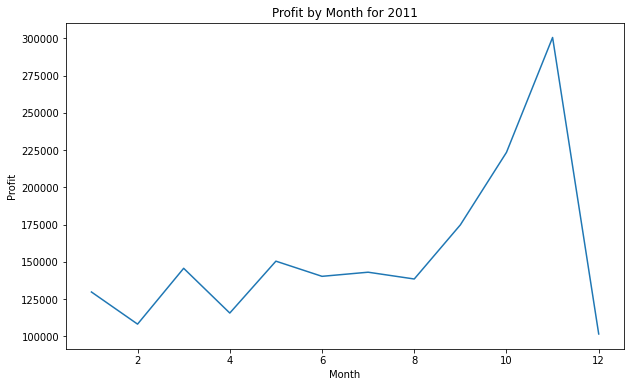

In [79]:
#Create lineplot
plt.figure(figsize=(10,6))
plt.title("Profit by Month for 2011")
plt.xlabel("Month")
plt.ylabel("Profit")
sns.lineplot(x="month", y="profit", data=month_profit_2011)
plt.show()